In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from ipynb.fs.full.functions import i_star, i_c, i_s, properties, rotor_inlet, delta_star, lc_star, lc_OD, compressor_solver
from ipynb.fs.full.functions import delta_OD, rotor_outlet, stator_outlet, efficiency, checker, stage_solver, stage_solver_star

# Data

In [2]:
alpha1 = 43                #degree
N_design = 6000            #RPM
N_stage  = 1
P01 = 100/101.325          #bar
T01 = 288                  #k
t_max_c = 0.12             #t_max/c

r_h1 = 0.2                 #meter
r_t1 = 0.3                 #meter
H1 = r_t1-r_h1

r_h2 = 0.205                #meter
r_t2 = 0.295                #meter
H2 = r_t2-r_h2

r_h3 = 0.21                #meter
r_t3 = 0.29                #meter
H3 = r_t3-r_h3

r_m1 = (r_h1+r_t1)/2
r_m2 = (r_h2+r_t2)/2
r_m3 = (r_h3+r_t3)/2

#for compressor:
C_p = 1.004                #kJ/kg-k
gama = 1.4  
R = 0.287                  #kJ/kg-k

## Rotor

In [3]:
beta_prime1 = 50         #degree
beta_prime2 = 30         #degree
sigma_r = 1              #rotor solidity at r_m
c_r = 0.04               #rotor chord[meter]
s_r = c_r/sigma_r

## Stator

In [4]:
alpha_prime2 = 57.6      #degree
alpha_prime3 = 32.6      #degree
sigma_s = 0.91           #stator solidity at r_m
c_s = 0.05               #stator chord[meter]
s_s = c_s/sigma_s

In [5]:
blade_type = ['C_Series','circular']
a_c = 0.5

# Operating Curves

## Operating Range

In [6]:
stage1_data = (alpha1, P01, T01, beta_prime1, beta_prime2, a_c, t_max_c, blade_type, sigma_r, sigma_s, alpha_prime2,
               alpha_prime3, r_m1, r_m2, r_m3, H1, H2, H3, r_h1, r_h2, r_t1, r_t2, s_s, s_r)
compressor_data = [stage1_data]

In [7]:
i_star_r, delta_star_r, beta2_star_r, i_star_s, delta_star_s, beta2_star_s, M_W1_star, M_C2_star, i_s_r, i_c_r, i_s_s, i_c_s, loss_coefficient_star_r, loss_coefficient_star_s = stage_solver_star(
    alpha1, N_design, P01, T01, beta_prime1, beta_prime2, a_c, t_max_c, blade_type, sigma_r, sigma_s, 
    alpha_prime2, alpha_prime3, r_m1, r_m2, r_m3, H1, H2, H3, gama, R, r_h1, r_h2, r_t1, r_t2, s_s, s_r, N_stage
)

In [8]:
i_or = np.linspace(i_c_r, i_s_r, 15)

In [9]:
N_or = N_design*np.array([0.5, 0.7, 0.8, 0.9, 1])

In [10]:
etta_or = np.zeros((len(N_or), len(i_or)))

In [11]:
P02_P01_or = np.zeros((len(N_or), len(i_or)))

In [12]:
m_dot_or =  np.zeros((len(N_or), len(i_or)))

In [13]:
m, n = 0, 0

In [14]:
for N in N_or:
    for i in i_or:
        
        print(f'for N = {N} and i = {i}, We have:')
        P02_P01_or[m][n], etta_or[m][n], m_dot_or[m][n], flag = compressor_solver(compressor_data, gama, i, N, R, N_design, N_stage)
                
        if flag == 0:
            P02_P01_or[m][n], etta_or[m][n], m_dot_or[m][n] = 0, 0, 0
            
        n = n+1
    
    m = m+1
    n = 0

for N = 3000.0 and i = -9.053541839608163, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 3000.0 and i = -7.79908315576556, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 3000.0 and i = -6.544624471922956, We have:
in stage 1, h is not True
in stage 1, P is not True
for N = 3000.0 and i = -5.290165788080351, We have:
in stage 1, P is not True
for N = 3000.0 and i = -4.035707104237748, We have:
everything in stage 1 is alright
everything in compressor is ok
for N = 3000.0 and i = -2.781248420395144, We have:
everything in stage 1 is alright
everything in compressor is ok
for N = 3000.0 and i = -1.5267897365525398, We have:
everything in stage 1 is alright
everything in compressor is ok
for N = 3000.0 and i = -0.2723310527099354, We have:
everything in stage 1 is alright
everything in compressor is ok
for N = 3000.0 and i = 0.9821276311326681, We have:
everything in stage 1 is alright
everything in compressor is ok
for N = 3000.0 and i = 2.2365

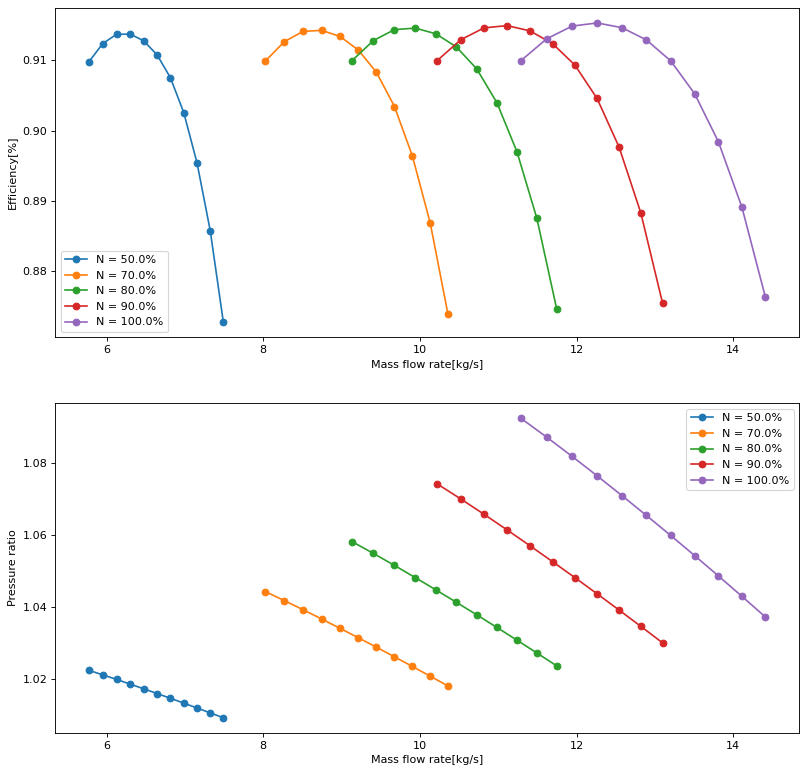

In [15]:
figure(figsize=(12, 12), dpi=80)
plt.subplot(2, 1, 1)

for i in range(0, len(N_or)):
    
    m_dot_corrected = np.array([m for m in m_dot_or[i] if m!=0])
    etta_corrected = np.array([m for m in etta_or[i] if m!=0])
    
    plt.plot(m_dot_corrected, etta_corrected, marker = "o", linestyle = "solid", label=f'N = {N_or[i]/N_design*100}%')
    plt.xlabel('Mass flow rate[kg/s]')
    plt.ylabel('Efficiency[%]')
    plt.legend()
    
    
plt.subplot(2, 1, 2)


for i in range(0, len(N_or)):
    
    m_dot_corrected = np.array([m for m in m_dot_or[i] if m!=0])
    P02_P01_corrected = np.array([m for m in P02_P01_or[i] if m!=0])
    
    plt.plot(m_dot_corrected, P02_P01_corrected, marker = "o", linestyle = "solid", label=f'N = {N_or[i]/N_design*100}%')
    plt.xlabel('Mass flow rate[kg/s]')
    plt.ylabel('Pressure ratio')
    plt.legend()
    